downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


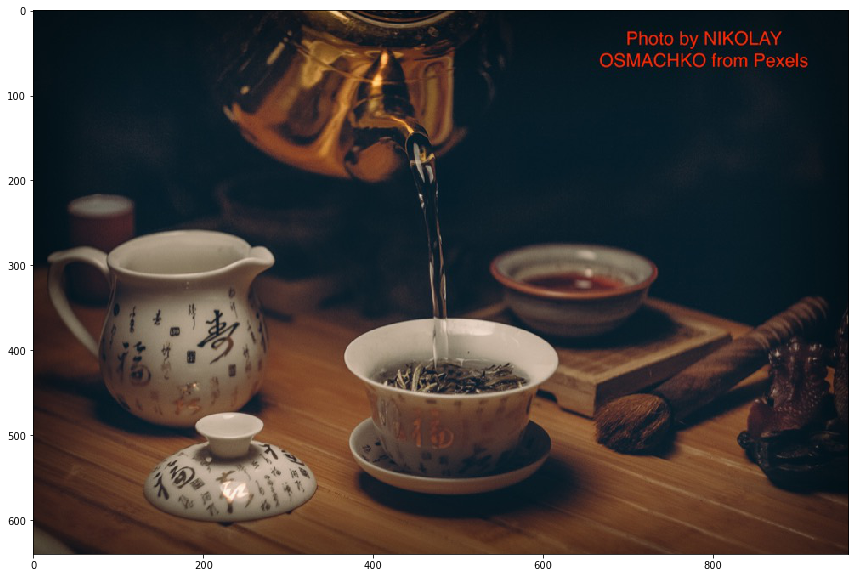

In [77]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)

plt.rcParams["figure.figsize"] = (20,10)

def cv2_imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cv2_imshow(imgc)

[[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]
Ellipse 
[[2.77941581e-09]]
[[2.79396772e-09]]
[[3.51428753e-09]]
[[5.32600097e-09]]
[[6.22821972e-09]]
u =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
m1v.T =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
v =  [[-3.17619447e-04 -2.09090136e-03  9.99997764e-01]
 [ 6.51716385e-01 -7.58461504e-01 -1.37887347e-03]
 [-7.58462690e-01 -6.51714489e-01 -1.60357680e-03]]
usv =  [[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]


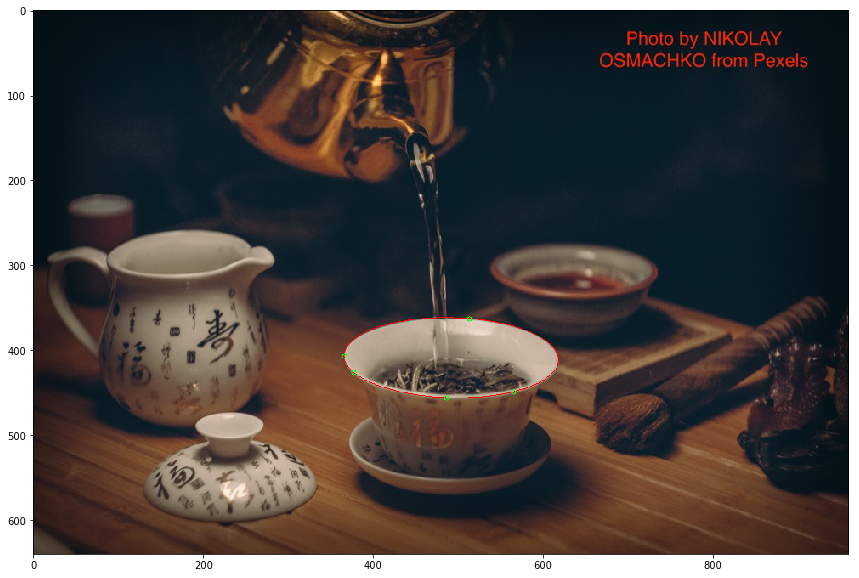

In [79]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449]], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
    m[k][0] = 2*points[k][0]*points[k][1]
    m[k][1] = points[k][1]*points[k][1]
    m[k][2] = 2*points[k][0]
    m[k][3] = 2*points[k][1]
    m[k][4] = 1
    r[k] = points[k][0]*points[k][0]
    
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
    print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
    
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
    a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])
    a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])
    cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
    
cv2_imshow(img)

In [80]:
def getElipseFrom6PlusPoints(img, points):
    m = np.zeros((7,7))

    for k in range(0, len(points)):
        m[k][0] = points[k][0]*points[k][0]
        m[k][1] = 2*points[k][0]*points[k][1]
        m[k][2] = points[k][1]*points[k][1]
        m[k][3] = 2*points[k][0]
        m[k][4] = 2*points[k][1]
        m[k][5] = 1

    mu, ms, mv = np.linalg.svd(m)
    R = mv[5, :] # last row of mv

    # R[0]=A R[1]=H R[2]=B R[3]=G R[4]=F R[5]=C
    R /= R[0]
    E = np.array(
    [[R[0], R[1], R[3]],
    [R[1], R[2], R[4]],
    [R[3], R[4], R[5]] ], np.double )

    #find circle->ellipse conversion
    u, s, v = np.linalg.svd(E)
    u2 = np.matmul(u, np.diag(np.sqrt(s)) )
    H = np.linalg.inv(u2.T)
    return H

In [81]:
points = np.array([[366,407],[513,363],[377,426],[486,456],[565,449],[417,371],[600,387]],np.double)

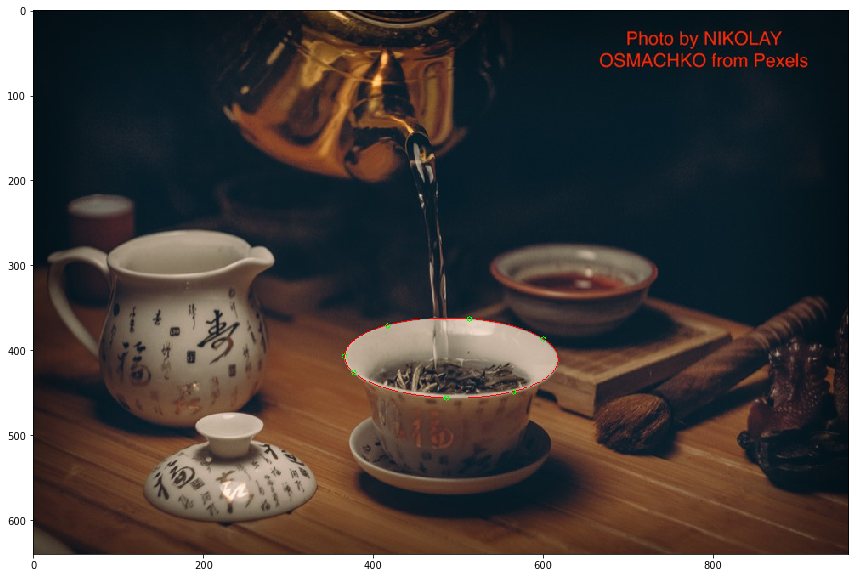

In [82]:
img = imgc.copy()
H = getElipseFrom6PlusPoints(img, points)
for alpha in range(0,360):
    a1 = np.matmul( Htrue, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])
    a2 = np.matmul( Htrue, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])
    cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
    
cv2_imshow(img)

In [83]:
def generateErrorForPoints(points, sigma):
    result = points.copy()
    for point_index in range(len(result)):
        result[point_index][0] = np.random.normal(result[point_index][0], sigma, 1)
        result[point_index][1] = np.random.normal(result[point_index][1], sigma, 1)
    return result

In [84]:
def getDistance(p1x, p1y, p2x, p2y):
    return sqrt( ((p1x-p2x)**2)+((p1y-p2y)**2) )

def getEllipseError(Htrue, H):
    result = 0
    for alpha in range(0,360):
        a1true = np.matmul(Htrue, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
        a1true = (a1true/a1true[2])
        a2true = np.matmul(Htrue, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
        a2true = (a2true/a2true[2])
        
        a1 = np.matmul(H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
        a1 = (a1/a1[2])
        a2 = np.matmul(H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
        a2 = (a2/a2[2])
        error1 = getDistance(a1true[0][0], a1true[1][0], a1[0][0], a1[1][0])
        error2 = getDistance(a2true[0][0], a2true[1][0], a2[0][0], a2[1][0])
        result = max(result, max(error1, error2))
    return result

Text(0.5, 1.0, 'Largest error in elipse for a standart normal error in points')

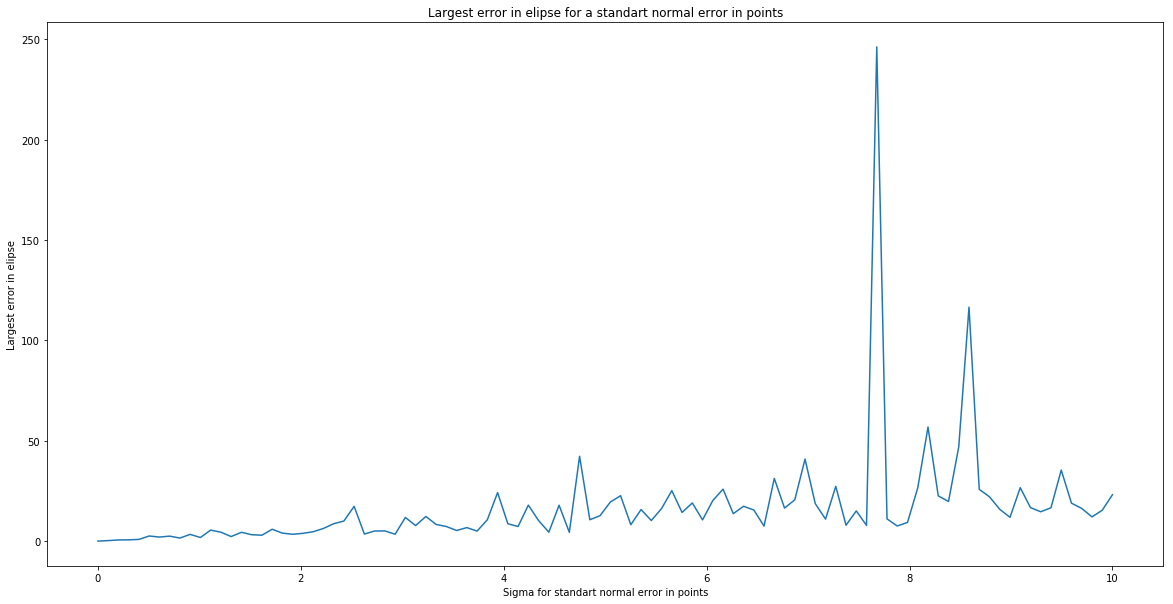

In [89]:
trueH = getElipseFrom6PlusPoints(imgc, points)
sigmas = np.linspace(0, 10, num=100)
errors = []
for i in range(len(sigmas)):
    errorPoints = generateErrorForPoints(points, sigmas[i])
    errorH = getElipseFrom6PlusPoints(imgc, errorPoints)
    error = getEllipseError(trueH, errorH)
    errors.append(error)

plt.plot(sigmas, errors)
plt.xlabel('Sigma for standart normal error in points') 
plt.ylabel('Largest error in elipse') 
plt.title("Largest error in elipse for a standart normal error in points")